In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/qubvel/segmentation_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-5xvt1uw5
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models /tmp/pip-req-build-5xvt1uw5
  Resolved https://github.com/qubvel/segmentation_models to commit e951c6747f75fa9e7240816d1c79dd2e66813123
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.1 MB/s eta 0:00:00
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-py3-none-any.whl size=33791 sha256=c4cd04eda17b364662fbc4530a7a695a6926798a254a609e69376d2b941d9932
  Stored in directory: /tmp/pip-ephem-wheel-cache-dfgiv69h/wheels/ce/d6/f1/5d00e82b3893c5f1ffee43bf7b8877148af09c7c9c6c4882c9
Successfully built segmentation-models


In [ ]:
from datetime import datetime
import tensorflow as tf
import segmentation_models as sm
import matplotlib.pyplot as plt

Segmentation Models: using `keras` framework.


In [ ]:
# desempacotamento de imagens em formato .zip
!unzip "/content/drive/MyDrive/TCC_BICT/PAC_SEGMENTATION_MEU/train.zip" -d "/content/" #train

Archive:  /content/drive/MyDrive/TCC_BICT/PAC_SEGMENTATION_MEU/train.zip
   creating: /content/train/
  inflating: /content/train/100.473.jpg  
  inflating: /content/train/100.473.tif  
  inflating: /content/train/107.84.jpg  
  inflating: /content/train/107.84.tif  
  inflating: /content/train/109.973.jpg  
  inflating: /content/train/109.973.tif  
  inflating: /content/train/114.833.jpg  
  inflating: /content/train/114.833.tif  
  inflating: /content/train/119.387.jpg  
  inflating: /content/train/119.387.tif  
  inflating: /content/train/127.88.jpg  
  inflating: /content/train/127.88.tif  
  inflating: /content/train/129.532.jpg  
  inflating: /content/train/129.532.tif  
  inflating: /content/train/131.977.jpg  
  inflating: /content/train/131.977.tif  
  inflating: /content/train/134.043.jpg  
  inflating: /content/train/134.043.tif  
  inflating: /content/train/135.637.jpg  
  inflating: /content/train/135.637.tif  
  inflating: /content/train/138.338.jpg  
  inflating: /conten

In [ ]:
# desempacotamento de imagens em formato .zip
!unzip "/content/drive/MyDrive/TCC_BICT/PAC_SEGMENTATION_MEU/test.zip" -d "/content/" #test

Archive:  /content/drive/MyDrive/TCC_BICT/PAC_SEGMENTATION_MEU/test.zip
   creating: /content/test/
  inflating: /content/test/101.217.jpg  
  inflating: /content/test/101.217.tif  
  inflating: /content/test/104.478.jpg  
  inflating: /content/test/104.478.tif  
  inflating: /content/test/125.983.jpg  
  inflating: /content/test/125.983.tif  
  inflating: /content/test/169.007.jpg  
  inflating: /content/test/169.007.tif  
  inflating: /content/test/22.713.jpg  
  inflating: /content/test/22.713.tif  
  inflating: /content/test/33.924.jpg  
  inflating: /content/test/33.924.tif  
  inflating: /content/test/36.583.jpg  
  inflating: /content/test/36.583.tif  
  inflating: /content/test/49.17.jpg  
  inflating: /content/test/49.17.tif  
  inflating: /content/test/51.691.jpg  
  inflating: /content/test/51.691.tif  
  inflating: /content/test/58.937.jpg  
  inflating: /content/test/58.937.tif  
  inflating: /content/test/59.763.jpg  
  inflating: /content/test/59.763.tif  
  inflating: /

In [ ]:
train_path = "/content/train/"
test_path = "/content/test/"

In [ ]:
import os
import numpy as np

In [ ]:
def load_data(path):
    # The list to store the images
    images = []
    # The list to store the masks
    masks = []
    # Get a list of all the file names in the folder
    file_names = os.listdir(path)
    # Sort the file names in order
    file_names.sort()

    # Iterate over the sorted file names
    for file_name in file_names:
        # Check if the file is an image
        if file_name.endswith((".jpg")):
            print(file_name)
            # Read the image
            image = tf.keras.utils.load_img(os.path.join(path, file_name), color_mode = "grayscale")
            image = tf.keras.utils.img_to_array(image)
            image /= 255.0
            # Add the image to the list
            images.append(image)
        # Check if the file is an image
        if file_name.endswith((".tif")):
            print(file_name)
            # Read the image
            mask = tf.keras.utils.load_img(os.path.join(path, file_name), color_mode = "grayscale")
            mask = tf.keras.utils.img_to_array(mask)
            mask /= 255.0
            # Add the image to the list
            masks.append(mask)
    return np.array(images), np.array(masks)

In [ ]:
X_train, y_train = load_data(train_path)

100.473.jpg
100.473.tif
107.84.jpg
107.84.tif
109.973.jpg
109.973.tif
114.833.jpg
114.833.tif
119.387.jpg
119.387.tif
127.88.jpg
127.88.tif
129.532.jpg
129.532.tif
131.977.jpg
131.977.tif
134.043.jpg
134.043.tif
135.637.jpg
135.637.tif
138.338.jpg
138.338.tif
138.73.jpg
138.73.tif
144.27.jpg
144.27.tif
161.82.jpg
161.82.tif
180.049.jpg
180.049.tif
180_100.473.jpg
180_100.473.tif
180_107.84.jpg
180_107.84.tif
180_109.973.jpg
180_109.973.tif
180_114.833.jpg
180_114.833.tif
180_119.387.jpg
180_119.387.tif
180_127.88.jpg
180_127.88.tif
180_129.532.jpg
180_129.532.tif
180_131.977.jpg
180_131.977.tif
180_134.043.jpg
180_134.043.tif
180_135.637.jpg
180_135.637.tif
180_138.338.jpg
180_138.338.tif
180_138.73.jpg
180_138.73.tif
180_144.27.jpg
180_144.27.tif
180_161.82.jpg
180_161.82.tif
180_180.049.jpg
180_180.049.tif
180_190.003.jpg
180_190.003.tif
180_194.683.jpg
180_194.683.tif
180_20.623.jpg
180_20.623.tif
180_37.823.jpg
180_37.823.tif
180_38.342.jpg
180_38.342.tif
180_43.564.jpg
180_43.564.

In [ ]:
X_test, y_test = load_data(test_path)

101.217.jpg
101.217.tif
104.478.jpg
104.478.tif
125.983.jpg
125.983.tif
169.007.jpg
169.007.tif
22.713.jpg
22.713.tif
33.924.jpg
33.924.tif
36.583.jpg
36.583.tif
49.17.jpg
49.17.tif
51.691.jpg
51.691.tif
58.937.jpg
58.937.tif
59.763.jpg
59.763.tif
65.467.jpg
65.467.tif
83.822.jpg
83.822.tif
84.063.jpg
84.063.tif


In [ ]:
# Print the number of images in the list
print(f"Number of train images: {len(X_train)}")
# Print the number of masks in the list
print(f"Number of train masks: {len(y_train)}")

Number of train images: 320
Number of train masks: 320


In [ ]:
# Print the number of images in the list
print(f"Number of test images: {len(X_test)}")
# Print the number of masks in the list
print(f"Number of test masks: {len(y_test)}")

Number of test images: 14
Number of test masks: 14


In [ ]:
# Plot image and corresponding mask
def plot_images(images, masks):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(images[0][:, :, 0], cmap="gray")
    ax[0].set_title("Image")
    ax[1].imshow(masks[0][:, :, 0], cmap="gray")
    ax[1].set_title("Mask")
    plt.show()

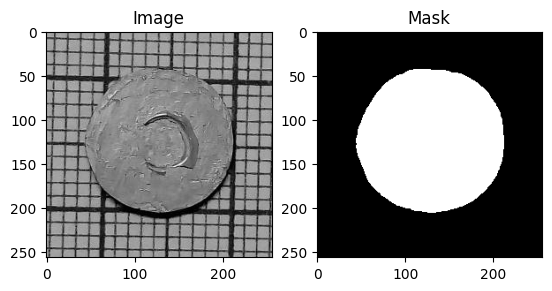

In [ ]:
plt_images = plot_images(X_train, y_train)

In [ ]:
X_train[-1].shape

(256, 256, 1)

In [ ]:
X_test[-1].shape

(256, 256, 1)

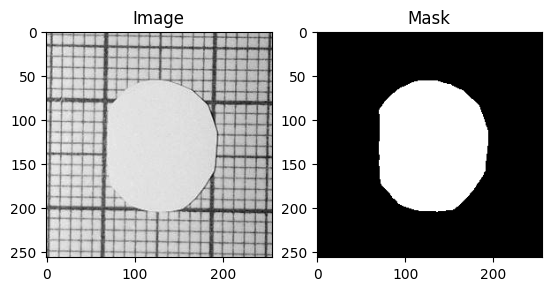

In [ ]:
plt_images = plot_images(X_test, y_test)

In [ ]:
y_train[-1].shape

(256, 256, 1)

In [ ]:
y_test[-1].shape

(256, 256, 1)

In [ ]:
# Encoder Utilities

def conv2d_block(input_tensor, n_filters, kernel_size = 3):
  '''
  Adds 2 convolutional layers with the parameters passed to it

  Args:
    input_tensor (tensor) -- the input tensor
    n_filters (int) -- number of filters
    kernel_size (int) -- kernel size for the convolution

  Returns:
    tensor of output features
  '''
  # first layer
  x = input_tensor # pass the output of the previous layer to a variable called 'x'
  for i in range(2):
    x = tf.keras.layers.Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
            kernel_initializer = 'he_normal', padding = 'same')(x)
    x = tf.keras.layers.Activation('relu')(x)

  return x


def encoder_block(inputs, n_filters=64, pool_size=(2,2), dropout=0.3):
  '''
  Adds two convolutional blocks and then perform down sampling on output of convolutions.

  Args:
    input_tensor (tensor) -- the input tensor
    n_filters (int) -- number of filters
    kernel_size (int) -- kernel size for the convolution

  Returns:
    f - the output features of the convolution block
    p - the maxpooled features with dropout
  '''

  f = conv2d_block(inputs, n_filters=n_filters)
  p = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(f)
  p = tf.keras.layers.Dropout(0.3)(p)

  return f, p


def encoder(inputs):
  '''
  This function defines the encoder or downsampling path.

  Args:
    inputs (tensor) -- batch of input images

  Returns:
    p4 - the output maxpooled features of the last encoder block
    (f1, f2, f3, f4) - the output features of all the encoder blocks
  '''
  f1, p1 = encoder_block(inputs, n_filters=64, pool_size=(2,2), dropout=0.3)
  f2, p2 = encoder_block(p1, n_filters=128, pool_size=(2,2), dropout=0.3)
  f3, p3 = encoder_block(p2, n_filters=256, pool_size=(2,2), dropout=0.3)
  f4, p4 = encoder_block(p3, n_filters=512, pool_size=(2,2), dropout=0.3)

  return p4, (f1, f2, f3, f4)

In [ ]:
def bottleneck(inputs):
  '''
  This function defines the bottleneck convolutions to extract more features before the upsampling layers.
  '''

  bottle_neck = conv2d_block(inputs, n_filters=1024)

  return bottle_neck

In [ ]:
# Decoder Utilities

def decoder_block(inputs, conv_output, n_filters=64, kernel_size=3, strides=3, dropout=0.3):
  '''
  defines the one decoder block of the UNet

  Args:
    inputs (tensor) -- batch of input features
    conv_output (tensor) -- features from an encoder block
    n_filters (int) -- number of filters
    kernel_size (int) -- kernel size
    strides (int) -- strides for the deconvolution/upsampling
    padding (string) -- "same" or "valid", tells if shape will be preserved by zero padding

  Returns:
    c (tensor) -- output features of the decoder block
  '''
  u = tf.keras.layers.Conv2DTranspose(n_filters, kernel_size, strides = strides, padding = 'same')(inputs)
  c = tf.keras.layers.concatenate([u, conv_output])
  c = tf.keras.layers.Dropout(dropout)(c)
  c = conv2d_block(c, n_filters, kernel_size=3)

  return c


def decoder(inputs, convs, output_channels):
  '''
  Defines the decoder of the UNet chaining together 4 decoder blocks.

  Args:
    inputs (tensor) -- batch of input features
    convs (tuple) -- features from the encoder blocks
    output_channels (int) -- number of classes in the label map

  Returns:
    outputs (tensor) -- the pixel wise label map of the image
  '''

  f1, f2, f3, f4 = convs

  c6 = decoder_block(inputs, f4, n_filters=512, kernel_size=(3,3), strides=(2,2), dropout=0.3)
  c7 = decoder_block(c6, f3, n_filters=256, kernel_size=(3,3), strides=(2,2), dropout=0.3)
  c8 = decoder_block(c7, f2, n_filters=128, kernel_size=(3,3), strides=(2,2), dropout=0.3)
  c9 = decoder_block(c8, f1, n_filters=64, kernel_size=(3,3), strides=(2,2), dropout=0.3)

  outputs = tf.keras.layers.Conv2D(output_channels, (1, 1), activation='sigmoid')(c9)

  return outputs

In [ ]:
OUTPUT_CHANNELS = 1

def unet():
  '''
  Defines the UNet by connecting the encoder, bottleneck and decoder.
  '''

  # specify the input shape
  inputs = tf.keras.layers.Input(shape=(256, 256,1))

  # feed the inputs to the encoder
  encoder_output, convs = encoder(inputs)

  # feed the encoder output to the bottleneck
  bottle_neck = bottleneck(encoder_output)

  # feed the bottleneck and encoder block outputs to the decoder
  # specify the number of classes via the `output_channels` argument
  outputs = decoder(bottle_neck, convs, output_channels=OUTPUT_CHANNELS)

  # create the model
  model = tf.keras.Model(inputs=inputs, outputs=outputs)

  return model

In [ ]:
# instantiate the model
model = unet()

# see the resulting model architecture
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 activation (Activation)        (None, 256, 256, 64  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
LR = 0.0001
optim = tf.keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
# set class weights for dice_loss (car: 1.; pedestrian: 2.; background: 0.5;)
dice_loss = sm.losses.DiceLoss(class_weights=np.array([0.25, 0.25]))
focal_loss = sm.losses.BinaryFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

In [ ]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [ ]:
start1 = datetime.now()

early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, mode="auto", restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[early])

stop1 = datetime.now()

Epoch 1/100
10/10 [==============================] - 88s 3s/step - loss: 1.0675 - iou_score: 0.0356 - f1-score: 0.0637 - val_loss: 0.9688 - val_iou_score: 4.0255e-05 - val_f1-score: 8.0506e-05
Epoch 2/100
10/10 [==============================] - 20s 2s/step - loss: 0.9672 - iou_score: 0.0475 - f1-score: 0.0878 - val_loss: 0.9608 - val_iou_score: 0.2404 - val_f1-score: 0.3876
Epoch 3/100
10/10 [==============================] - 20s 2s/step - loss: 1.3339 - iou_score: 0.0918 - f1-score: 0.1535 - val_loss: 0.9642 - val_iou_score: 5.0319e-11 - val_f1-score: 5.0319e-11
Epoch 4/100
10/10 [==============================] - 19s 2s/step - loss: 0.9683 - iou_score: 3.1504e-04 - f1-score: 6.2976e-04 - val_loss: 0.9705 - val_iou_score: 5.0319e-11 - val_f1-score: 5.0319e-11
Epoch 5/100
10/10 [==============================] - 19s 2s/step - loss: 0.9642 - iou_score: 0.0015 - f1-score: 0.0030 - val_loss: 0.9674 - val_iou_score: 0.0030 - val_f1-score: 0.0060
Epoch 6/100
10/10 [========================

In [ ]:
#Execution time of the model
execution_time_unet = stop1-start1
print("Unet execution time is: ", execution_time_unet)

Unet execution time is:  0:33:27.472720


In [ ]:
print(early.best_epoch)

90


In [ ]:
print(early.best)

0.7551449537277222


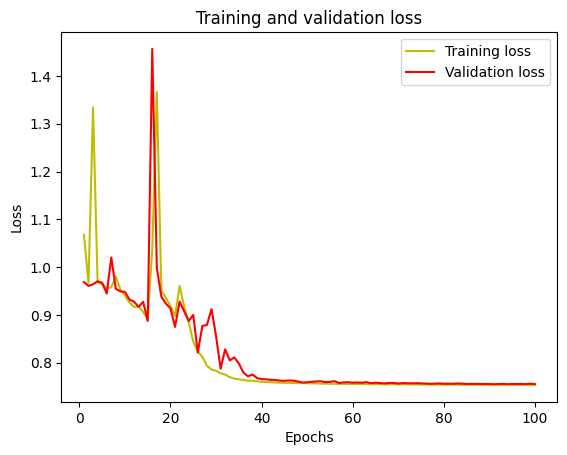

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(min(history.history['loss']))
print(min(history.history['val_loss']))

0.7536697387695312
0.7551449537277222


In [ ]:
print(max(history.history['loss']))
print(max(history.history['val_loss']))

1.3664337396621704
1.4565938711166382


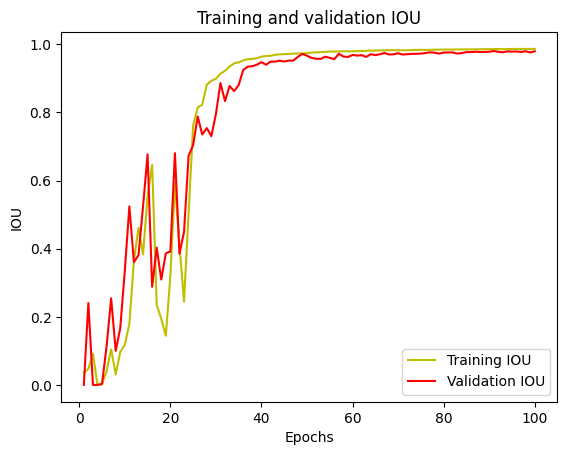

In [ ]:
acc = history.history['iou_score']
val_acc = history.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

In [ ]:
print(min(history.history['iou_score']))
print(min(history.history['val_iou_score']))

0.00031504424987360835
5.03185132449957e-11


In [ ]:
print(max(history.history['iou_score']))
print(max(history.history['val_iou_score']))

0.9866833686828613
0.980602502822876


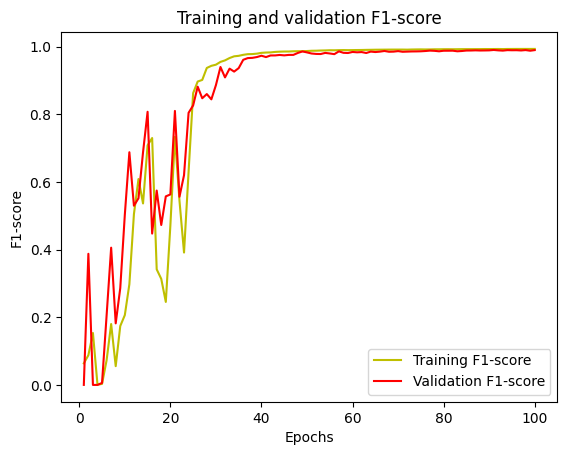

In [ ]:
acc = history.history['f1-score']
val_acc = history.history['val_f1-score']

plt.plot(epochs, acc, 'y', label='Training F1-score')
plt.plot(epochs, val_acc, 'r', label='Validation F1-score')
plt.title('Training and validation F1-score')
plt.xlabel('Epochs')
plt.ylabel('F1-score')
plt.legend()
plt.show()

In [ ]:
print(max(history.history['f1-score']))
print(max(history.history['val_f1-score']))

0.9932965040206909
0.990206241607666


In [ ]:
print(min(history.history['f1-score']))
print(min(history.history['val_f1-score']))

0.0006297567160800099
5.03185132449957e-11


In [ ]:
# Predict the mask for the input image
pred_mask = model.predict(np.expand_dims(X_test[-1], axis=0))

1/1 [==============================] - 2s 2s/step


In [ ]:
#pred_mask.reshape(256,256, 1)
pred_mask.shape

(1, 256, 256, 1)

In [ ]:
#pred_mask.reshape(256, 256, 1)

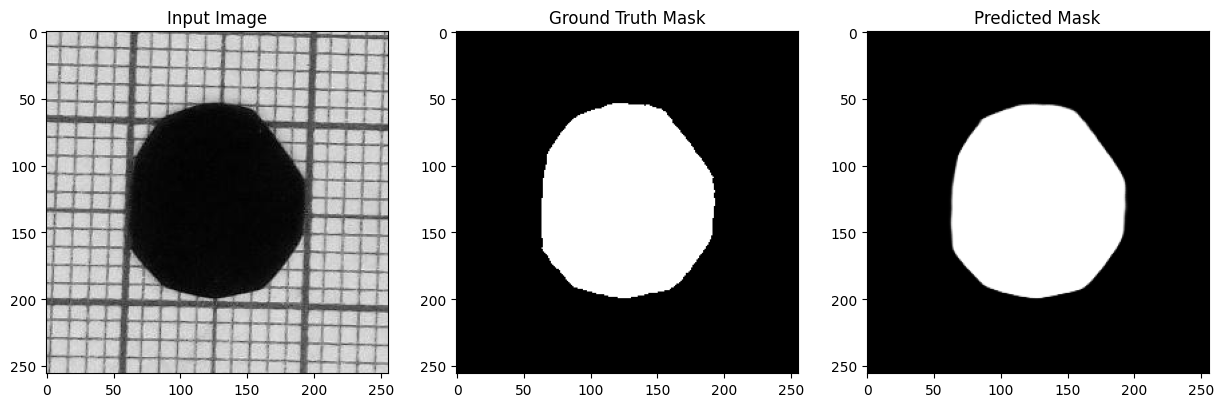

In [ ]:
# Plot the input image, ground truth mask and predicted mask

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(X_test[-1][:, :, 0], cmap="gray")
plt.title("Input Image")

plt.subplot(1, 3, 2)
plt.imshow(y_test[-1][..., 0], cmap="gray")
plt.title("Ground Truth Mask")

plt.subplot(1, 3, 3)
plt.imshow(pred_mask[0, ..., 0], cmap="gray")
plt.title("Predicted Mask")

plt.show()

In [ ]:
model.save('/content/drive/MyDrive/TCC_BICT/PAC_SEGMENTATION_MEU/model_h5/unet_segment_samples_090623_diceloss_datetime.h5')

In [ ]:
y_pred_unet=model.predict(X_test)
y_pred_unet_argmax=np.argmax(y_pred_unet, axis=3)

NameError: ignored

In [ ]:
#Using built in keras function
from keras.metrics import MeanIoU
n_classes = 2

In [ ]:
IOU_unet = MeanIoU(num_classes=n_classes)
IOU_unet.update_state(y_test[:,:,:,0], y_pred_unet_argmax)

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[718770.,      0.],
       [198734.,      0.]], dtype=float32)>

In [ ]:
print("Mean IoU using Unet =", IOU_unet.result().numpy())

Mean IoU using Unet = 0.39169857


#Load model and run on all images of test

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/TCC_BICT/PAC_SEGMENTATION_MEU/model_h5/unet_segment_samples_090623_diceloss_2.h5')

ValueError: ignored

In [ ]:
# desempacotamento de imagens em formato .zip
!unzip "/content/drive/MyDrive/PAC_SEGMENTATION_MEU/test.zip" -d "/content/" #test

In [ ]:
test_path = "/content/test/"

In [ ]:
def load_data(path):
    # The list to store the images
    images = []
    # The list to store the masks
    masks = []
    # Get a list of all the file names in the folder
    file_names = os.listdir(path)
    # Sort the file names in order
    file_names.sort()

    # Iterate over the sorted file names
    for file_name in file_names:
        # Check if the file is an image
        if file_name.endswith((".jpg")):
            print(file_name)
            # Read the image
            image = tf.keras.utils.load_img(os.path.join(path, file_name), target_size=(256, 256), color_mode = "grayscale")
            image = tf.keras.utils.img_to_array(image)
            image /= 255.0
            # Add the image to the list
            images.append(image)
        # Check if the file is an image
        if file_name.endswith((".tif")):
            print(file_name)
            # Read the image
            mask = tf.keras.utils.load_img(os.path.join(path, file_name), target_size=(256, 256), color_mode = "grayscale")
            mask = tf.keras.utils.img_to_array(mask)
            mask /= 255.0
            # Add the image to the list
            masks.append(mask)
    return np.array(images), np.array(masks)

In [ ]:
X_test, y_test = load_data(test_path)

101.217.jpg
101.217.tif
104.478.jpg
104.478.tif
125.983.jpg
125.983.tif
169.007.jpg
169.007.tif
22.713.jpg
22.713.tif
33.924.jpg
33.924.tif
36.583.jpg
36.583.tif
49.17.jpg
49.17.tif
51.691.jpg
51.691.tif
58.937.jpg
58.937.tif
59.763.jpg
59.763.tif
65.467.jpg
65.467.tif
83.822.jpg
83.822.tif
84.063.jpg
84.063.tif


In [ ]:
# Predict the mask for the input image
pred_mask = model.predict(X_test)

1/1 [==============================] - 0s 22ms/step


In [ ]:
#pred_mask.reshape(256,256, 1)
pred_mask[-1].shape

(256, 256, 1)

In [ ]:
# Plot the input image, ground truth mask and predicted mask

for i in range(len(pred_mask)):
    plt.figure(figsize=(15, 15))
    plt.subplot(1, 3, 1)
    plt.imshow(X_test[i][:, :, 0], cmap="gray")
    plt.title("Input Image")

    plt.subplot(1, 3, 2)
    plt.imshow(y_test[i][..., 0], cmap="gray")
    plt.title("Ground Truth Mask")

    plt.subplot(1, 3, 3)
    plt.imshow(pred_mask[i], cmap="gray")
    plt.title("Predicted Mask")

    plt.show()

Output hidden; open in https://colab.research.google.com to view.